# Exploratory Data Analysis for Kelmarsh wind farm Data

Introduction

This Jupyter notebook aims to perform exploratory data analysis (EDA) on turbine data collected from the Kelmarsh wind farm. The primary file used for analysis is "Turbine_Kelmarsh.csv." It is important to note that this dataset is part of the larger 'Kelmarsh wind farm dataset,' consisting of multiple CSV files with similar structures but varying values.

Dataset Overview

The primary dataset, "Turbine_Kelmarsh.csv," was exported by Greenbyte from a Senvion MM92 turbine at Kelmarsh. The data includes information collected over a specific time interval, with columns providing details about the turbine's performance. The key columns in the dataset include:

**Date and Time:** Timestamp of the data record.
**Wind Speed (m/s):** The speed of the wind at the turbine location.
**Wind Speed, Standard Deviation (m/s):** Standard deviation of the wind speed.
**Wind Speed, Minimum (m/s):** Minimum recorded wind speed.
**Wind Speed, Maximum (m/s):** Maximum recorded wind speed.
**Long Term Wind (m/s):** Long-term wind speed.
**Rotor Speed (RPM):** Speed of the turbine rotor.
**Generator RPM (RPM):** RPM of the generator.
**Gearbox Speed (RPM):** RPM of the gearbox.
**Tower Acceleration X (mm/ss):** Tower acceleration in the X-axis.
**Tower Acceleration Y (mm/ss):** Tower acceleration in the Y-axis.
**Equivalent Full Load Hours (s):** Equivalent full load hours.

Exploratory Analysis

This notebook explores various aspects of the turbine data, including visualizations of wind speed, rotor speed, tower acceleration, and other relevant parameters. Different plots and charts are employed to provide insights into the behavior and performance of the turbine during the specified time interval.

**Note:** The analysis presented here is based on a subset of the 'Kelmarsh dataset.' Additional CSV files with similar structures but different values are part of the complete dataset.



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Wind Speed Over Time

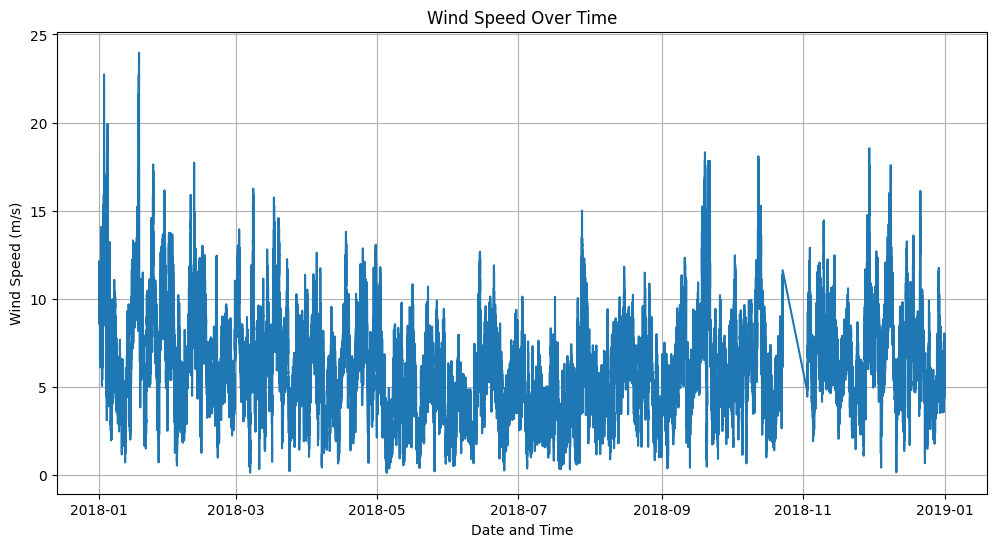

In [21]:
file_path = '../files/Kelmarsh/Turbine_Kelmarsh.csv'
df = pd.read_csv(file_path, skiprows=9, parse_dates=['# Date and time'])  # Replace space with underscore
df.head()

plt.figure(figsize=(12, 6))
sns.lineplot(x='# Date and time', y='Wind speed (m/s)', data=df)  # Replace space with underscore
plt.title('Wind Speed Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

## Statistics of Wind Speed

In [22]:
statistics = df['Wind speed (m/s)'].describe()
print(statistics)

count    50755.000000
mean         6.079390
std          2.725442
min          0.150000
25%          4.119713
50%          5.794384
75%          7.653149
max         23.964783
Name: Wind speed (m/s), dtype: float64


# Comparison between Sensor 1 and Sensor 2

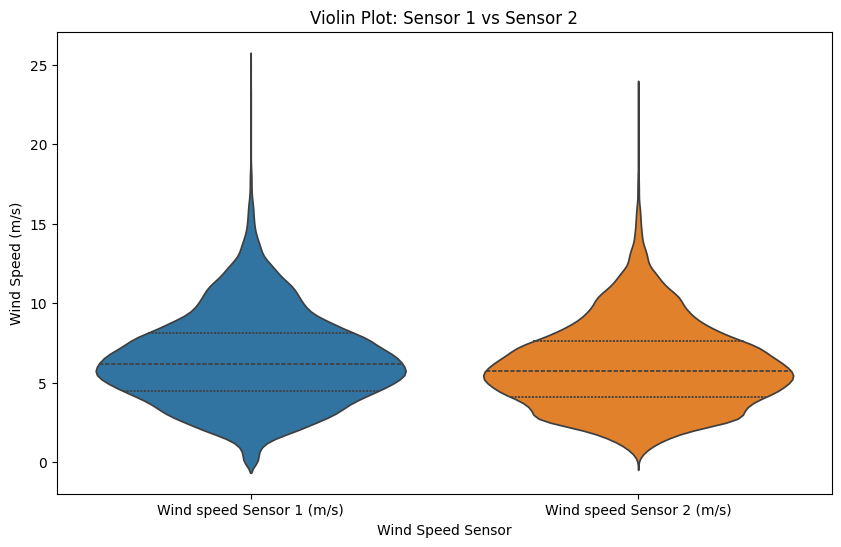

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Wind speed Sensor 1 (m/s)', 'Wind speed Sensor 2 (m/s)']], inner="quartile")
plt.title('Violin Plot: Sensor 1 vs Sensor 2')
plt.xlabel('Wind Speed Sensor')
plt.ylabel('Wind Speed (m/s)')
plt.show()

# Distribution of Wind Direction

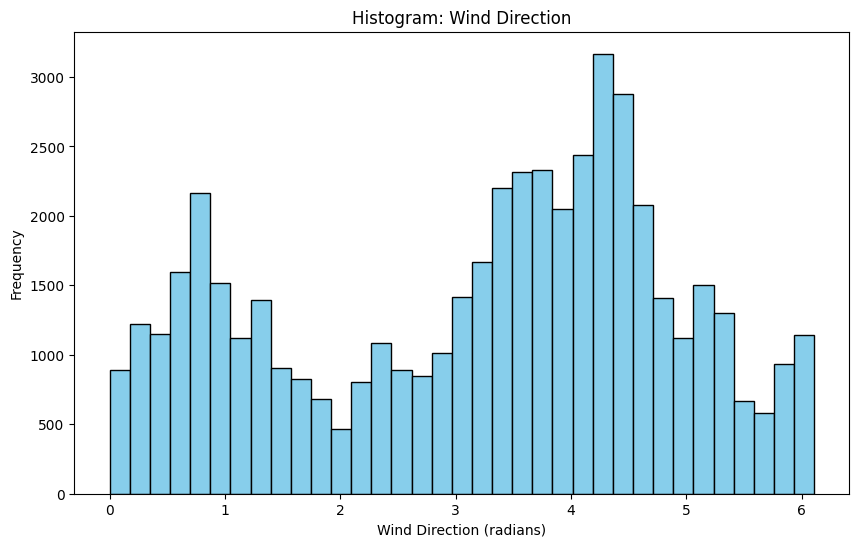

In [24]:
plt.figure(figsize=(10, 6))

plt.hist(np.deg2rad(df['Wind direction (°)']), bins=np.arange(0, 2 * np.pi, np.pi / 18), color='skyblue', edgecolor='black')
plt.title('Histogram: Wind Direction')
plt.xlabel('Wind Direction (radians)')
plt.ylabel('Frequency')
plt.show()

## Statistics of Wind Direction

In [25]:
statistics = df['Wind direction (°)'].describe()
print(statistics)

count    50755.000000
mean       186.687392
std         96.588206
min          0.003618
25%         98.464920
50%        206.737885
75%        256.027786
max        359.997070
Name: Wind direction (°), dtype: float64


# Distribution of Energy Export 

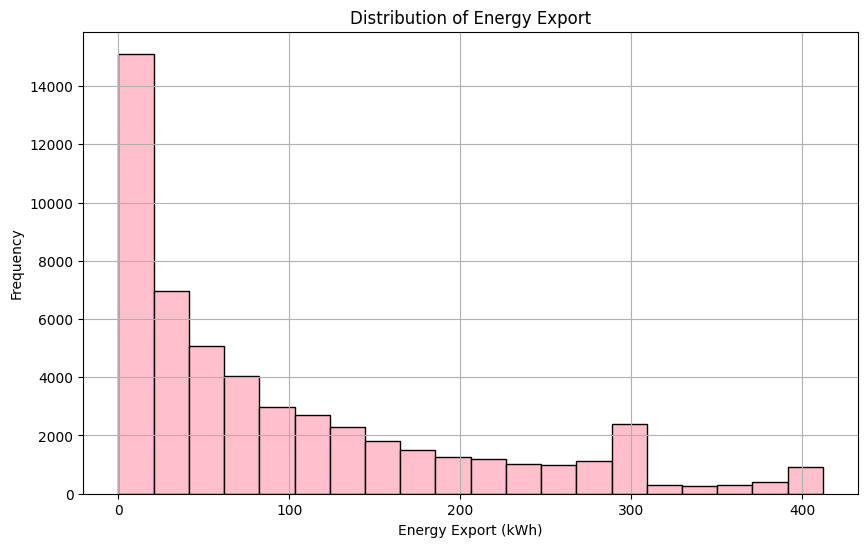

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['Energy Export (kWh)'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Energy Export')
plt.xlabel('Energy Export (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Statistics of Energy Export

In [27]:
statistics = df['Lost Production Total (kWh)'].describe()
print(statistics)

count    52554.000000
mean         5.592598
std         37.629290
min        -94.571411
25%         -4.411945
50%          0.000000
75%          5.229550
max        342.997941
Name: Lost Production Total (kWh), dtype: float64


# Power Distribution

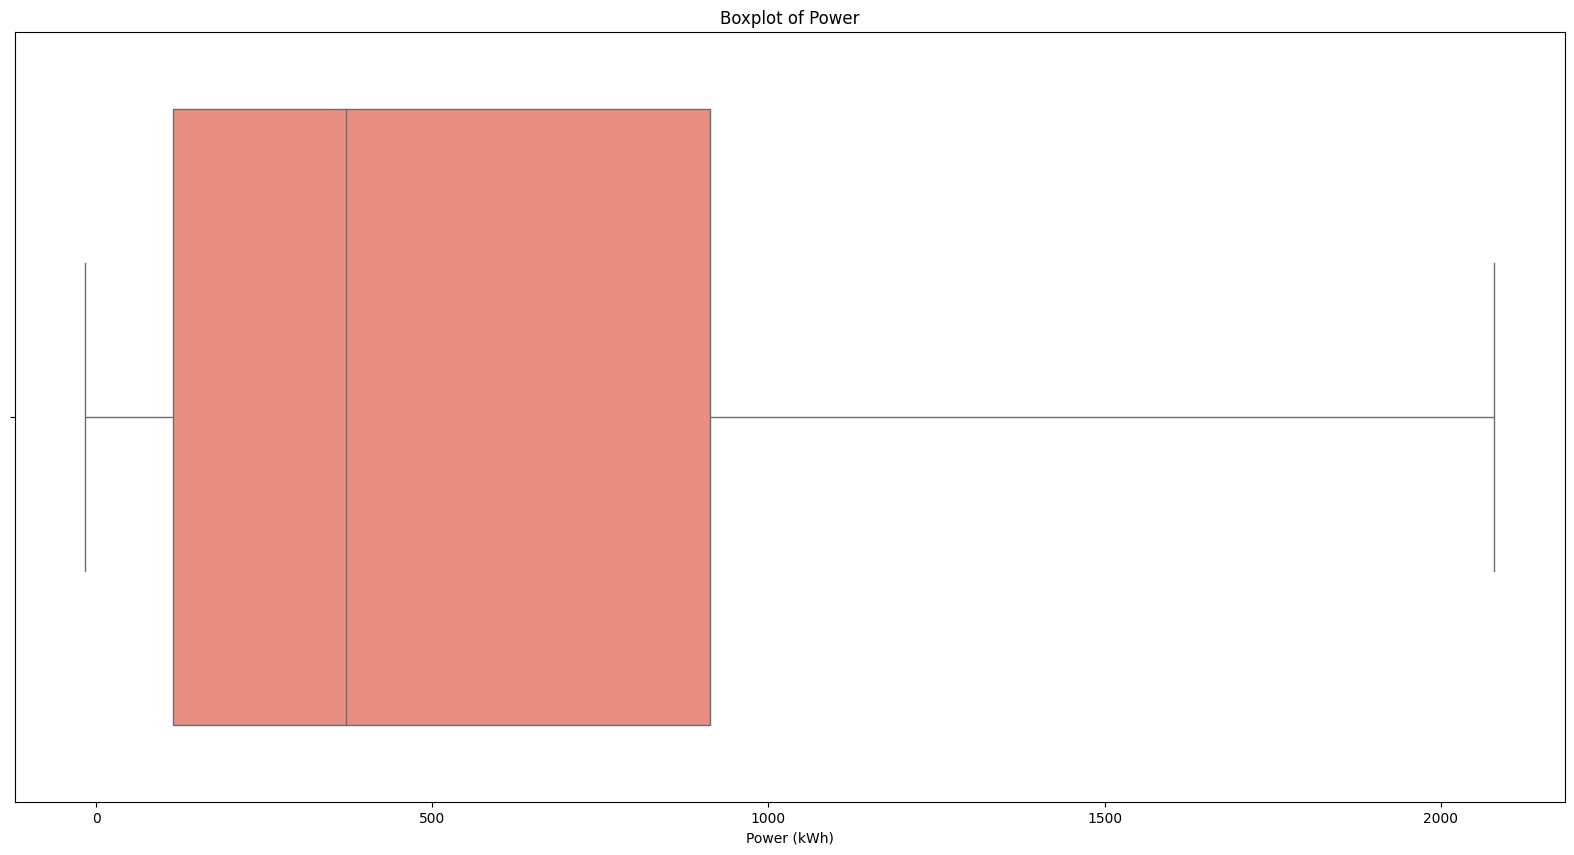

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['Power (kW)'], color='salmon')
plt.title('Boxplot of Power')
plt.xlabel('Power (kWh)')
plt.show()

## Statistics of Power 

In [29]:
statistics = df['Power (kW)'].describe()
print(statistics)

count    50755.000000
mean       602.373116
std        616.167426
min        -16.335312
25%        114.718239
50%        371.249207
75%        913.365143
max       2079.998779
Name: Power (kW), dtype: float64


# Temperature Distribution

In [30]:
temperature_columns = [
    'Front bearing temperature (°C)',
    'Rear bearing temperature (°C)',
    'Nacelle temperature (°C)',
    'Transformer temperature (°C)',
    'Gear oil temperature (°C)',
    'Hub temperature (°C)'
]

plt.figure(figsize=(12, 6))

# Line plot for temperature columns over time (assuming Date_and_time is your time column)
for column in temperature_columns:
    sns.lineplot(x='# Date and time', y=column, data=df, label=column)

plt.title('Temperature Trends Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Statistics of Grid Voltage

In [31]:
statistics = df['Grid voltage (V)'].describe()
print(statistics)

count    50755.000000
mean       402.786738
std          3.214956
min        150.201080
25%        401.323792
50%        402.884979
75%        404.364960
max        409.329803
Name: Grid voltage (V), dtype: float64


# Statistics of Grid Current

In [32]:
statistics = df['Grid current (A)'].describe()
print(statistics)

count    50755.000000
mean       536.354453
std        524.581422
min          2.911111
25%        122.583500
50%        338.053986
75%        801.328125
max       1807.508301
Name: Grid current (A), dtype: float64


# Statistics of Grid Frequency

In [33]:
statistics = df['Grid frequency (Hz)'].describe()
print(statistics)

count    50755.000000
mean        49.988023
std          0.300085
min         18.730637
25%         49.950626
50%         49.988838
75%         50.031107
max         50.176804
Name: Grid frequency (Hz), dtype: float64


# Speed Distribution (RPM)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


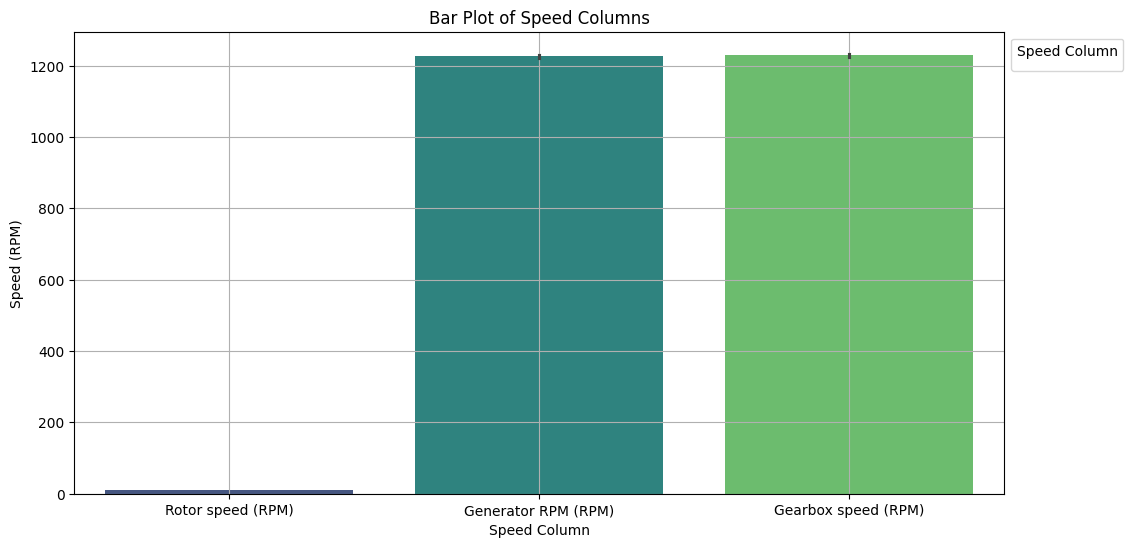

In [34]:
speed_columns = ['Rotor speed (RPM)', 'Generator RPM (RPM)', 'Gearbox speed (RPM)']
plt.figure(figsize=(12, 6))

# Bar plot for speed columns without time
sns.barplot(data=df.melt(id_vars='# Date and time', value_vars=speed_columns),
            x='variable', y='value', hue='variable', palette='viridis')

plt.title('Bar Plot of Speed Columns')
plt.xlabel('Speed Column')
plt.ylabel('Speed (RPM)')
plt.legend(title='Speed Column', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Distribution of Full Load Hours

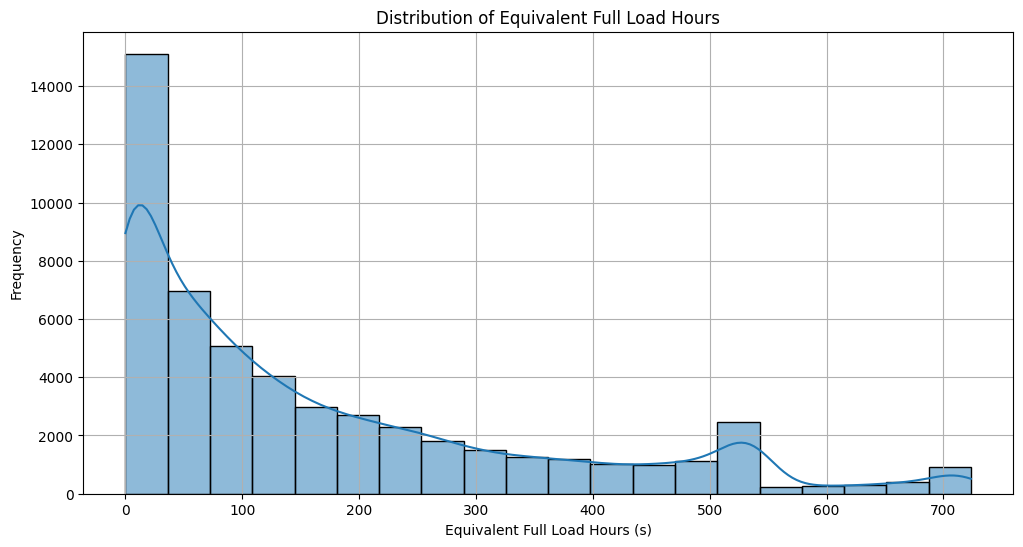

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Equivalent Full Load Hours (s)', data=df, bins=20, kde=True)
plt.title('Distribution of Equivalent Full Load Hours')
plt.xlabel('Equivalent Full Load Hours (s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Tower Acceleration in X and Y

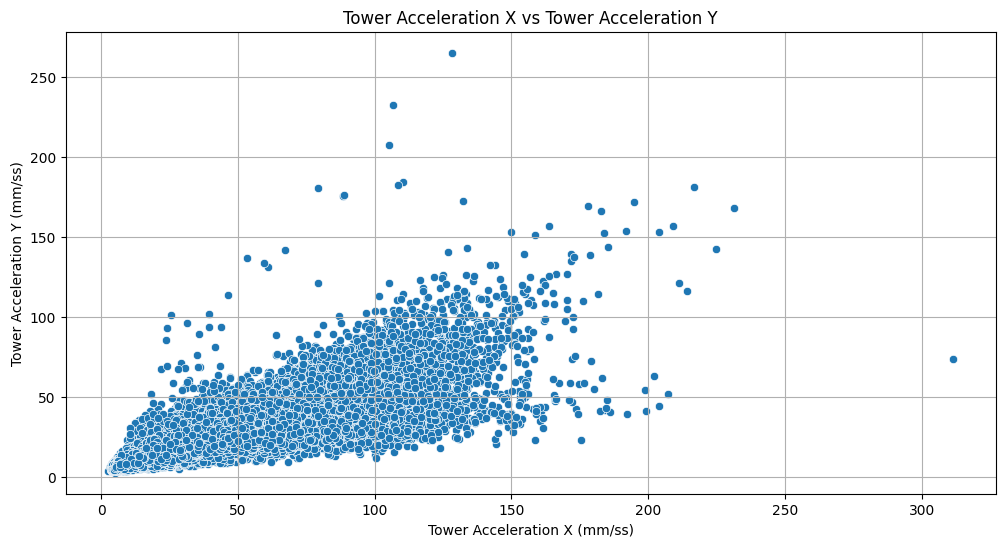

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tower Acceleration X (mm/ss)', y='Tower Acceleration y (mm/ss)', data=df)
plt.title('Tower Acceleration X vs Tower Acceleration Y')
plt.xlabel('Tower Acceleration X (mm/ss)')
plt.ylabel('Tower Acceleration Y (mm/ss)')
plt.grid(True)
plt.show()

# Missing Values

In [37]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
# Date and time                                 0
Wind speed (m/s)                             1805
Wind speed, Standard deviation (m/s)         1805
Wind speed, Minimum (m/s)                    1805
Wind speed, Maximum (m/s)                    1805
                                            ...  
Drive train acceleration, Max (mm/ss)       52560
Drive train acceleration, Min (mm/ss)       52560
Drive train acceleration, StdDev (mm/ss)    52560
Tower Acceleration X, StdDev (mm/ss)        52560
Tower Acceleration Y, StdDev (mm/ss)        52560
Length: 299, dtype: int64
